In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path of data
df = pd.read_csv("/content/clean_df.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


**SIMPLE LINEAR REGRESSION**

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# Create linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# create a linear function
X = df[["highway-mpg"]]
Y = df["price"]

In [6]:
# fit the linear model
lm.fit(X, Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
# Value of the intercept
lm.intercept_

38423.3058581574

In [9]:
# vaue of the coefficient
lm.coef_

array([-821.73337832])

In [10]:
# Q
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
X = df[["engine-size"]]
Y = df[["price"]]

In [12]:
lm1.fit(X, Y)
lm1

LinearRegression()

In [13]:
Yhat = lm1.predict(X)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [14]:
# value of the intercept
lm1.intercept_

array([-7963.33890628])

In [15]:
# value of the slope
lm1.coef_

array([[166.86001569]])

**MULTIPLE LINEAR REGRESSION**

In [16]:
Z =df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm.fit(Z, df[['price']])

LinearRegression()

In [17]:
lm.intercept_

array([-15811.86376773])

In [18]:
lm.coef_

array([[53.53022809,  4.70805253, 81.51280006, 36.1593925 ]])

In [19]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [20]:
Q = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Q, df['price'])
lm2

LinearRegression()

In [21]:
lm2.intercept_

38201.31327245728

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

**MODEL EVALUATION USING VISUALIZATION**

In [23]:
# import the visualizaaation package using seaborn
import seaborn as sns
%matplotlib inline

(0.0, 48170.565574466396)

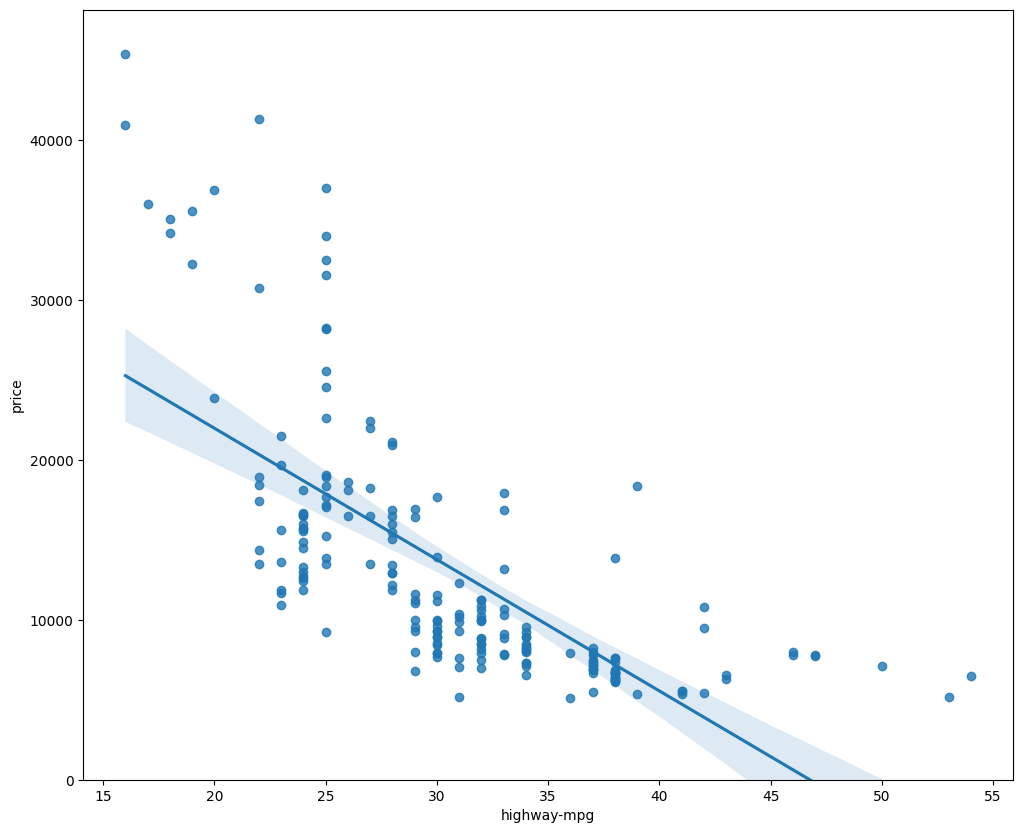

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

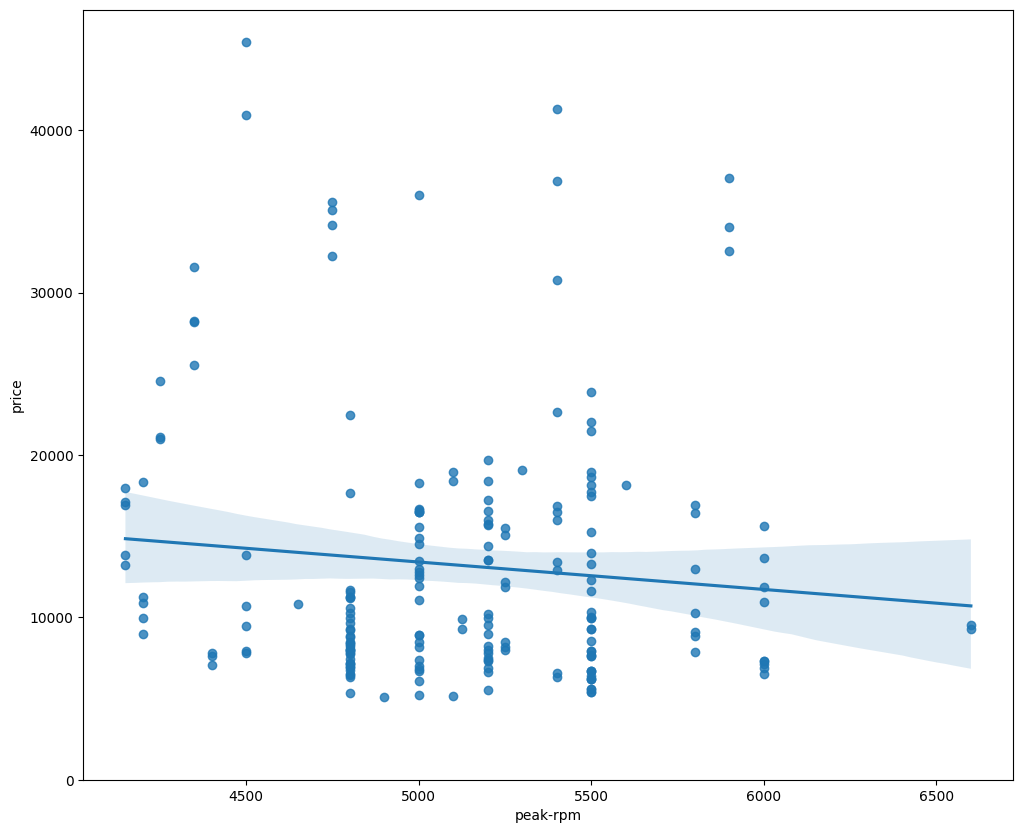

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [26]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()  # 'highway-mpg' has a higher correlate

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


RESIDUAL PLOT



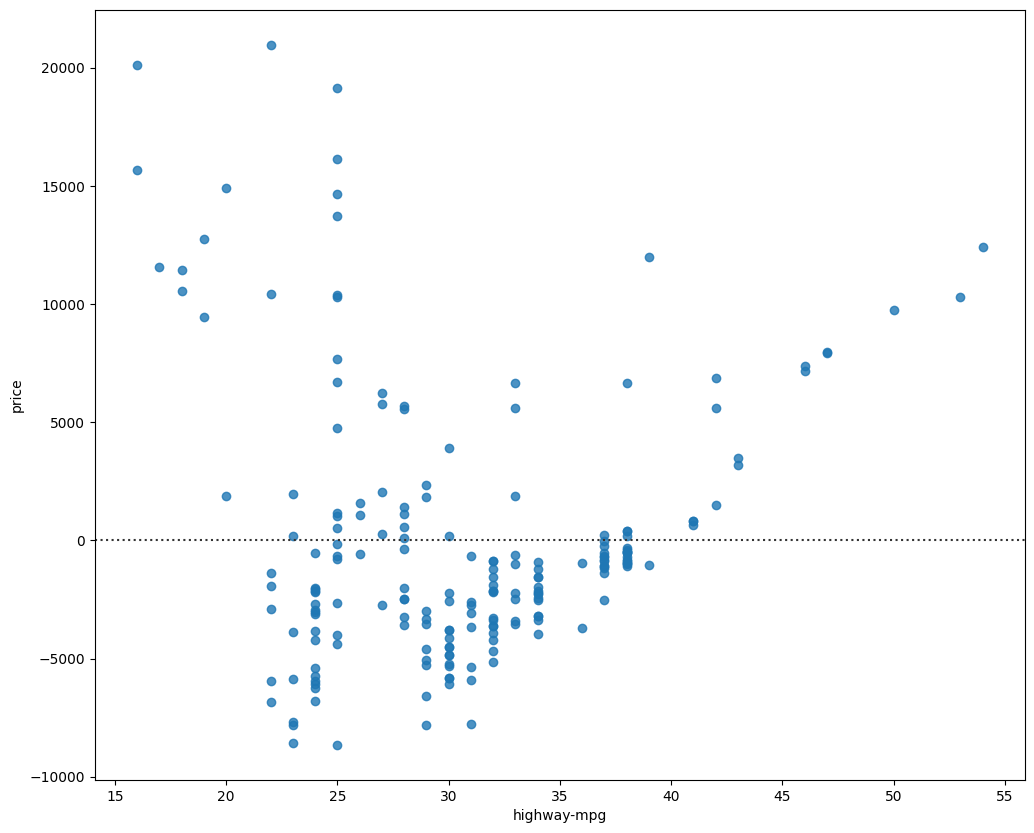

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

How do we visualize a model for Multiple Linear Regression?

One way to look at the fit of the model is by looking at the distribution plot.

In [28]:
Y_hat = lm.predict(Z)

The .distplot() function was used in earlier versions of the Seaborn library to visualize the distribution of a dataset using a histogram along with a Kernel Density Estimate (KDE) curve

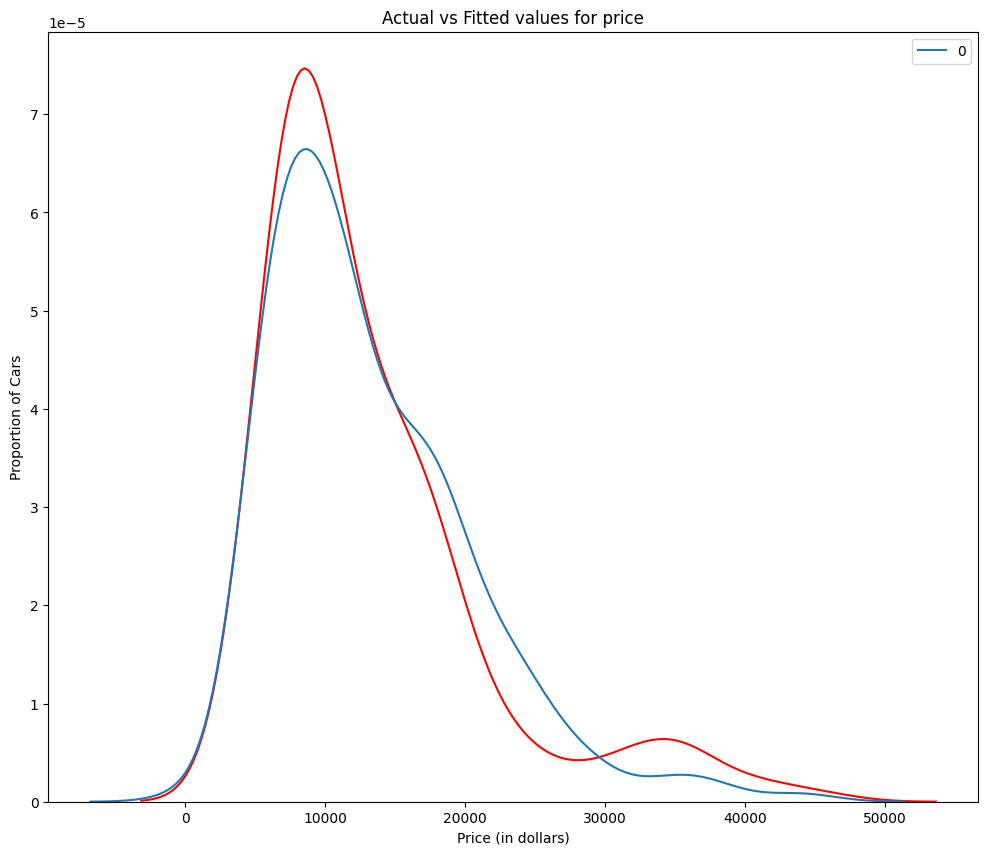

In [29]:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'],  color='r', label='Actual Value')   # plot KDE plot for actual value
sns.kdeplot(Y_hat, color='b', label='Fitted Values', ax=ax1)    # plot KDE plot for fitted valuee

plt.title('Actual vs Fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**POLYNOMIAL REGRESSION**

In [30]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
  x_new = np.linspace(5, 15, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new)
  plt.title('Polynomial Fit with Matplotlib for price ~ length')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf
  plt.xlabel(Name)
  plt.ylabel('Price of Cars')

  plt.show()
  plt.close()

In [31]:
# Get the variables
x = df['highway-mpg']
y = df['price']

In [32]:
# Here we use a polynomial of the 3rd order
f = np.polyfit(x, y, 3)  # To fit
p = np.poly1d(f)   # To display
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


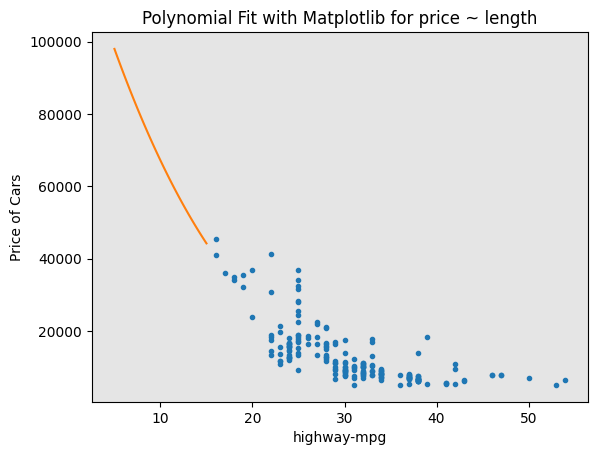

In [33]:
PlotPolly(p, x, y, 'highway-mpg')

In [34]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [35]:
# 11 order polynomial
f = np.polyfit(x, y, 11)
g = np.poly1d(f)
print(g)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


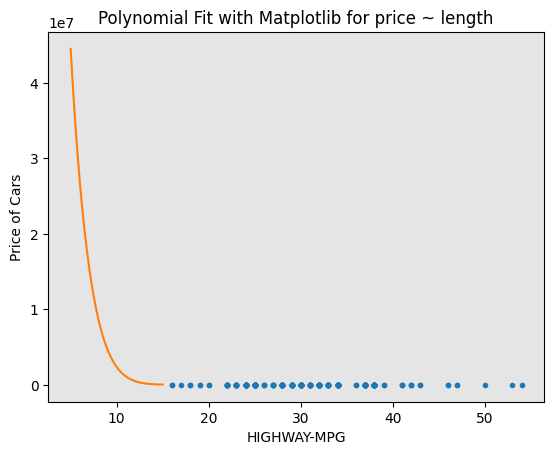

In [36]:
PlotPolly(g, x, y, 'HIGHWAY-MPG')

In [37]:
from sklearn.preprocessing import PolynomialFeatures

***PolynomialFeatures(degree=2) in Scikit-learn.***

In Scikit-learn, PolynomialFeatures is a class from the preprocessing module used to generate polynomial and interaction features from input data.

Purpose:
It transforms the input features into polynomial combinations up to the specified degree.
Useful in Polynomial Regression to model non-linear relationships.

In [38]:
# Create PolynomialFeatures object and Transform input to include polynomial terms
pr=PolynomialFeatures(degree=2)
pr
Z_pr = pr.fit_transform(Z)

For an input array X of shape (n_samples, n_features) and a polynomial degree d, the output shape is:

***Z.shape = (n-samples, N)***

Where N is the number of polynomial features.

In [39]:
# Original data set
Z.shape

(201, 4)

In [40]:
# Shape of the the transformed array
Z_pr.shape

(201, 15)

**PIPELINE**

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
# Create Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
Z = Z.astype(float)   # Convert data type to float
pipe.fit(Z, y)     # Fit data into the pipeline

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

In [45]:
# Create another pipeline
Input_1 = [('scale', StandardScaler(),), ('model', LinearRegression())]
pipe_1 = Pipeline(Input_1)
pipe_1

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [46]:
Z = Z.astype(float)  # Convert data to float type
pipe_1.fit(Z, y)    # Fit data into pipeline

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [47]:
ypipe = pipe_1.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

**MEASURES FOR IN-SAMPLE EVALUATION**

MODEL 1: SIMPLE LINEAR REGRESSION


In [48]:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-squre is: ', lm.score(X, Y))

The R-squre is:  0.7609686443622008


In [49]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(df['price'], Yhat)
print("The mean squared error for the price and the predicted value is: ", mse)

The mean squared error for the price and the predicted value is:  15021126.025174143


MODULE 2: MULTIPLE LINEAR REGRESSION

In [52]:
# Fit the model
lm.fit(Z, df['price'])
# Find the R^2
print("The R-square is: ", lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


In [53]:
predicted_value = lm.predict(Z)
print('The output for the first six predicted value is: ', predicted_value[0:6])
print('The mean square error of price and the predicted value is: ', \
      mean_squared_error(df['price'], predicted_value))

The output for the first six predicted value is:  [13699.07700462 13699.07700462 19052.71346719 10620.61524404
 15520.90025344 13869.27463809]
The mean square error of price and the predicted value is:  11979300.34981888


POLYNIMIAL FIT

In [54]:
from sklearn.metrics import r2_score

***r2_score()*** is a function in the scikit-learn library in Python that calculates the coefficient of determination, R^2
 , which is a statistical measure of how well the predictions of a regression model approximate the actual data points.

In [55]:
r_squared = r2_score(y, p(x))            # 'p(x)' is the predicted value
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [56]:
# MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

**PREDICTION AND DECISION MAKING**

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [59]:
# Create new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [60]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [61]:
yhat = lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

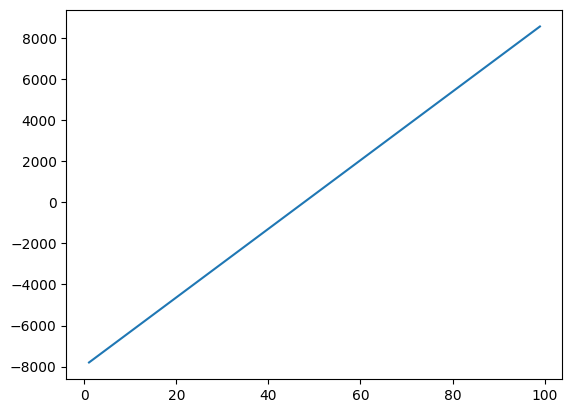

In [62]:
plt.plot(new_input, yhat)
plt.show()